In [27]:
from osgeo import gdal
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import elevation
import earthpy.spatial as es

In [72]:
!eio clip -o Tatun-30m-DEM.tif --bounds 121. 24.5 122 25.5

curl -s -o spool/N24/N24E121.hgt.gz.temp https://s3.amazonaws.com/elevation-tiles-prod/skadi/N24/N24E121.hgt.gz && mv spool/N24/N24E121.hgt.gz.temp spool/N24/N24E121.hgt.gz
gunzip spool/N24/N24E121.hgt.gz 2>/dev/null || touch spool/N24/N24E121.hgt
gdal_translate -q -co TILED=YES -co COMPRESS=DEFLATE -co ZLEVEL=9 -co PREDICTOR=2 spool/N24/N24E121.hgt cache/N24/N24E121.tif 2>/dev/null || touch cache/N24/N24E121.tif
rm spool/N24/N24E121.hgt
gdalbuildvrt -q -overwrite SRTM1.vrt cache/N24/N24E121.tif cache/N25/N25E121.tif cache/N41/N41E012.tif cache/N41/N41W122.tif cache/N41/N41W123.tif
cp SRTM1.vrt SRTM1.b37acead75dd43a9915fae1d3118d972.vrt
gdal_translate -q -co TILED=YES -co COMPRESS=DEFLATE -co ZLEVEL=9 -co PREDICTOR=2 -projwin 121.0 25.5 122.0 24.5 SRTM1.b37acead75dd43a9915fae1d3118d972.vrt /Users/nghianc/earth-analytics/Tatun-30m-DEM.tif
rm -f SRTM1.b37acead75dd43a9915fae1d3118d972.vrt


In [73]:
filename = "Tatun-30m-DEM.tif"
gdal_data = gdal.Open(filename)
gdal_band = gdal_data.GetRasterBand(1)
nodataval = gdal_band.GetNoDataValue()

# convert to a numpy array
data_array = gdal_data.ReadAsArray().astype(np.float)
print(type(data_array))

# replace missing values if necessary
if np.any(data_array == nodataval):
    data_array[data_array == nodataval] = np.nan

<class 'numpy.ndarray'>


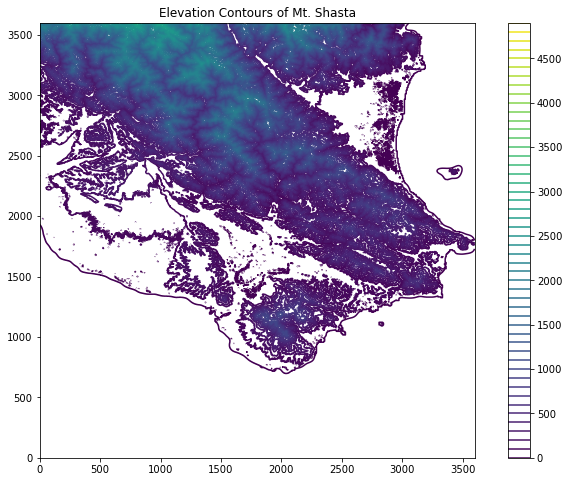

In [74]:
#Plot out data with Matplotlib's 'contour'
fig = plt.figure(figsize = (12, 8))
ax = fig.add_subplot(111)
plt.contour(data_array, cmap = "viridis", 
            levels = list(range(0, 5000, 100)))
plt.title("Elevation Contours of Mt. Shasta")
cbar = plt.colorbar()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [75]:
# Create and plot the hillshade with earthpy
hillshade = es.hillshade(data_array)

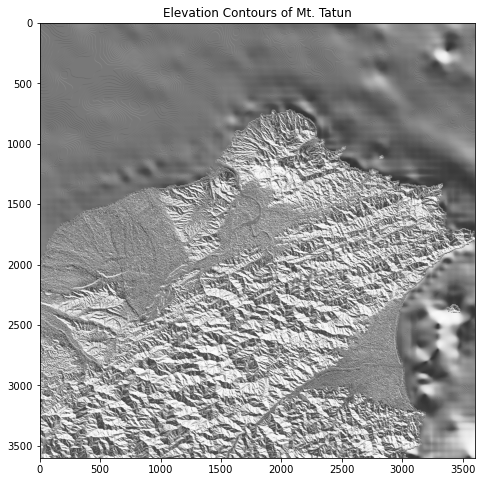

In [76]:
#Plot our data with Matplotlib's 'contourf'
fig = plt.figure(figsize = (12, 8))
#cs = plt.contourf(data_array, cmap = "terrain", alpha=0.4, 
#            levels = list(range(0, 5000, 100)))
plt.imshow(hillshade, cmap="Greys", alpha=0.8)
plt.title("Elevation Contours of Mt. Tatun")
# cbar = plt.colorbar(cs)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()